In [2]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append('/content/jupyter/mta-accessibility')
# from src.data import process_turnstile
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
ee_turnstile = pd.read_csv('../../data/interim/crosswalks/ee_turnstile.csv')

In [10]:
ee_turnstile.remote = ee_turnstile.remote.apply(lambda x: literal_eval(str(x)))

In [11]:
lst_col = 'remote'
subway_turnstile = pd.DataFrame({col:np.repeat(ee_turnstile[col].values, ee_turnstile[lst_col].str.len())
for col in ee_turnstile.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(ee_turnstile[lst_col].values)})[ee_turnstile.columns.tolist()]
subway_turnstile.drop(columns = ['Unnamed: 0'], inplace=True)

In [12]:
subway_turnstile.head()

,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,clean_lines,remote
0,125 St,EL125,125 St & Lexington Ave (NE corner) to Mezzanin...,MN,4/5/6/METRO-NORTH,EL,Y,Y,4-5-6,R132
1,125 St,EL142,125 St & St Nicholas Ave (SW corner) to Mezzan...,MN,A/B/C/D,EL,Y,Y,A-B-C-D,R102
2,125 St,EL143,Mezzanine to downtown Platform,MN,A/B/C/D,EL,Y,Y,A-B-C-D,R102
3,125 St,EL126,Mezzanine to Platforms for service in both dir...,MN,4/5/6/METRO-NORTH,EL,Y,Y,4-5-6,R132
4,125 St,EL144,Mezzanine to uptown Platform,MN,A/B/C/D,EL,Y,Y,A-B-C-D,R102


In [6]:
interpolated = pd.read_pickle('../../data/processed/interpolated_data.pkl.gz')

In [7]:
interpolated.head()

,LINENAME,STATION,UNIT,SCP,index,ENTRIES,EXITS,entry_diff,exit_diff,entry_diff_abs,exit_diff_abs,time_diffs
datetime,,,,,,,,,,,,
2019-01-01 03:00:00,1,125 ST,R034,00-00-00,89427.0,639382699.0,3.196906e+08,79.0,107.0,79.0,107.0,4.0
2019-01-01 04:00:00,1,125 ST,R034,00-00-00,89427.0,639382705.0,3.196906e+08,79.0,107.0,79.0,107.0,4.0
2019-01-01 05:00:00,1,125 ST,R034,00-00-00,89427.0,639382711.0,3.196906e+08,79.0,107.0,79.0,107.0,4.0
2019-01-01 06:00:00,1,125 ST,R034,00-00-00,89427.0,639382717.0,3.196906e+08,79.0,107.0,79.0,107.0,4.0
2019-01-01 07:00:00,1,125 ST,R034,00-00-00,94934.0,639382723.0,3.196906e+08,24.0,35.0,24.0,35.0,4.0


In [8]:
interpolated[interpolated.UNIT == "R001"].head()

,LINENAME,STATION,UNIT,SCP,index,ENTRIES,EXITS,entry_diff,exit_diff,entry_diff_abs,exit_diff_abs,time_diffs
datetime,,,,,,,,,,,,
2019-01-01 00:00:00,1RW,SOUTH FERRY,R001,02-00-00,86669.0,3261229.0,5125432.0,85.0,129.0,85.0,129.0,4.0
2019-01-01 01:00:00,1RW,SOUTH FERRY,R001,02-00-00,86669.0,3261235.5,5125456.5,85.0,129.0,85.0,129.0,4.0
2019-01-01 02:00:00,1RW,SOUTH FERRY,R001,02-00-00,86669.0,3261242.0,5125481.0,85.0,129.0,85.0,129.0,4.0
2019-01-01 03:00:00,1RW,SOUTH FERRY,R001,02-00-00,86669.0,3261248.5,5125505.5,85.0,129.0,85.0,129.0,4.0
2019-01-01 04:00:00,1RW,SOUTH FERRY,R001,02-00-00,91798.0,3261255.0,5125530.0,26.0,98.0,26.0,98.0,4.0


In [9]:
interpolated.shape

(19089586, 12)

In [10]:
interpolated_grps = interpolated.reset_index().groupby(['UNIT','datetime']).sum()[['entry_diff_abs','exit_diff_abs']]

In [11]:
interpolated_grps.reset_index(inplace=True)

In [12]:
interpolated_grps.head()

,UNIT,datetime,entry_diff_abs,exit_diff_abs
0,R001,2019-01-01 00:00:00,1612.0,1734.0
1,R001,2019-01-01 01:00:00,1612.0,1734.0
2,R001,2019-01-01 02:00:00,1612.0,1734.0
3,R001,2019-01-01 03:00:00,1612.0,1734.0
4,R001,2019-01-01 04:00:00,647.0,1407.0


In [13]:
interpolated_grps.shape

(1234501, 4)

In [14]:
outage = pd.read_pickle('../../data/processed/hourly_outages.pkl.gz')

In [15]:
outage.head()

,Time,Percentage,Equipment Number,Planned Outage,Station Name,Equipment Type
0,2019-01-03 01:00:00,0.9425,EL103,False,191 St,elevator
1,2019-01-03 02:00:00,1.0000,EL103,False,191 St,elevator
2,2019-01-03 03:00:00,1.0000,EL103,False,191 St,elevator
3,2019-01-03 04:00:00,1.0000,EL103,False,191 St,elevator
4,2019-01-03 05:00:00,0.0575,EL103,False,191 St,elevator


In [16]:
outage['Equipment Type'].unique()

array(['elevator', 'escalator'], dtype=object)

In [ ]:
outage_el = outage[outage['Equipment Type'] == 'elevator']

In [ ]:
# outage_el = outage_el.merge(subway_turnstile,left_on="Equipment Number",right_on="equipment_id")

In [ ]:
outage.shape

In [ ]:
outage_el.shape

In [17]:
df_new = interpolated_grps.merge(subway_turnstile,how="outer",left_on=['UNIT'],right_on=['remote'])

In [18]:
df_new.shape

(7005398, 14)

In [19]:
df_new.head()

,UNIT,datetime,entry_diff_abs,exit_diff_abs,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,clean_lines,remote
0,R001,2019-01-01,1612.0,1734.0,South Ferry,EL731,Mezzanine to Platform,MN,1,EL,Y,Y,1,R001
1,R001,2019-01-01,1612.0,1734.0,South Ferry,ES373,Mezzanine to Street,MN,1,ES,N,Y,1,R001
2,R001,2019-01-01,1612.0,1734.0,South Ferry,ES369,Mezzanine to Street,MN,1,ES,N,Y,1,R001
3,R001,2019-01-01,1612.0,1734.0,South Ferry,ES375,Mezzanine to Street,MN,1,ES,N,Y,1,R001
4,R001,2019-01-01,1612.0,1734.0,South Ferry,ES370,Mezzanine to Street,MN,1,ES,N,Y,1,R001


In [20]:
df_new = df_new.merge(outage,how='left',left_on=["equipment_id","datetime"],right_on=["Equipment Number","Time"])

In [22]:
df_new[df_new.UNIT == "R274"].head()

,UNIT,datetime,entry_diff_abs,exit_diff_abs,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,clean_lines,remote,Time,Percentage,Equipment Number,Planned Outage,Station Name,Equipment Type
5316382,R274,2019-01-01 03:00:00,251.0,687.0,191 St,EL106,Lower Mezzanine to Street Level Arcade at St N...,MN,1,EL,N,Y,1,R274,NaT,NaN,NaN,NaN,NaN,NaN
5316383,R274,2019-01-01 03:00:00,251.0,687.0,191 St,EL105,Lower Mezzanine to Street Level Arcade at St N...,MN,1,EL,N,Y,1,R274,NaT,NaN,NaN,NaN,NaN,NaN
5316384,R274,2019-01-01 03:00:00,251.0,687.0,191 St,EL104,Lower Mezzanine to Street Level Arcade at St N...,MN,1,EL,N,Y,1,R274,NaT,NaN,NaN,NaN,NaN,NaN
5316385,R274,2019-01-01 03:00:00,251.0,687.0,191 St,EL103,Street to Mezzanine / Mezzanine to Platform,MN,1,EL,N,Y,1,R274,NaT,NaN,NaN,NaN,NaN,NaN
5316386,R274,2019-01-01 04:00:00,251.0,687.0,191 St,EL106,Lower Mezzanine to Street Level Arcade at St N...,MN,1,EL,N,Y,1,R274,NaT,NaN,NaN,NaN,NaN,NaN


In [23]:
df_new = df_new[['datetime','UNIT','equipment_id','station_name','Percentage','entry_diff_abs','exit_diff_abs','Planned Outage','subway_lines','equipment_type']]

In [24]:
df_new[df_new.UNIT == "R274"].head()

,datetime,UNIT,equipment_id,station_name,Percentage,entry_diff_abs,exit_diff_abs,Planned Outage,subway_lines,equipment_type
5316382,2019-01-01 03:00:00,R274,EL106,191 St,NaN,251.0,687.0,NaN,1,EL
5316383,2019-01-01 03:00:00,R274,EL105,191 St,NaN,251.0,687.0,NaN,1,EL
5316384,2019-01-01 03:00:00,R274,EL104,191 St,NaN,251.0,687.0,NaN,1,EL
5316385,2019-01-01 03:00:00,R274,EL103,191 St,NaN,251.0,687.0,NaN,1,EL
5316386,2019-01-01 04:00:00,R274,EL106,191 St,NaN,251.0,687.0,NaN,1,EL


In [ ]:
interpolated.shape

In [ ]:
interpolated[interpolated.UNIT == "R274"].sort_index()

In [ ]:
interpolated.reset_index().sort_values(['UNIT','datetime']).head()

In [148]:
len(interpolated.STATION.unique())

122

In [ ]:
# df_new = df_new[df_new.equipment_type == 'EL']

In [ ]:
df_new[df_new.UNIT == "R274"].head()

In [ ]:
df_new[df_new.UNIT == "R274"].sort_values(['Equipment Number','UNIT']).sort_index()

In [27]:
df_new.set_index('datetime',inplace=True)

In [ ]:
df_new.drop_duplicates(inplace=True)

In [25]:
df_new.Percentage.fillna(0,inplace=True)

In [32]:
downtime_el = df_new.groupby(df_new.index.floor('d')).sum()['Percentage'].div(df_new.groupby(df_new.index.floor('d')).count()['Percentage'])

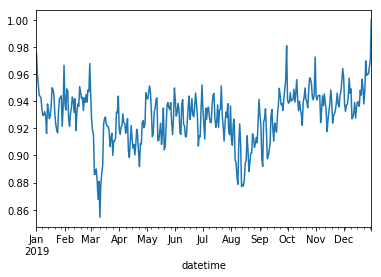

In [33]:
downtime_el = 1- downtime_el
downtime_el.plot()

In [ ]:
subway_turnstile[subway_turnstile.remote == 'R274']

In [ ]:
df_new[(df_new.UNIT == "R274") & (df_new.index >= '2019-01-02')].sort_index().head(50)

In [ ]:
df_new[df_new.UNIT == "R274"].groupby(df_new[df_new.UNIT == "R274"].index.floor('d')).count()['Percentage']

In [101]:
df_new = pd.read_pickle("../../data/processed/turnstile_with_outage.pkl.gz")

In [145]:
df_new[df_new.equipment_id == "EL434"]

,UNIT,equipment_id,station_name,Percentage,entry_diff_abs,exit_diff_abs,Planned Outage,subway_lines,flow_abs,weighted_downtime
datetime,,,,,,,,,,
NaT,NaN,EL434,Kew Gardens / Union Tpk,0.0,NaN,NaN,NaN,E/F,NaN,NaN


In [140]:
df_new.equipment_id.value_counts()

ES208     35068
ES206     35064
ES207     35060
ES209     35060
ES205     35060
ES204     35056
ES210     35052
ES203     35044
ES256     35044
ES255     35044
EL206     35032
EL204     35032
EL205     35032
ES609X    35028
ES608X    35028
EL296     35028
EL244     35028
ES610X    35028
ES215     26286
ES249     26286
ES248     26274
EL225     26274
EL227     26271
EL228     26271
EL325     26271
EL226     26271
EL324     26271
ES213     17542
ES244     17536
ES356     17530
          ...  
ES323      8757
EL196      8757
EL426      8757
EL219      8757
EL110      8757
EL194      8757
EL419X     8757
EL730      8757
EL143      8757
EL438      8757
ES220      8757
EL448X     8757
EL726X     8757
EL190      8757
EL283      8757
EL326      8757
EL122      8757
EL372      8757
EL115      8757
EL279X     8521
EL434         1
ES113         1
EL132         1
EL436         1
EL131         1
ES114         1
EL135         1
EL134         1
EL435         1
EL133         1
Name: equipment_id, Leng

In [103]:
df_new.set_index('datetime',inplace=True)

In [108]:
df_new.head()

,UNIT,equipment_id,station_name,Percentage,entry_diff_abs,exit_diff_abs,Planned Outage,subway_lines
datetime,,,,,,,,
2019-01-01,R001,EL731,South Ferry,0.0,1612.0,1734.0,NaN,1
2019-01-01,R001,ES373,South Ferry,0.0,1612.0,1734.0,NaN,1
2019-01-01,R001,ES369,South Ferry,0.0,1612.0,1734.0,NaN,1
2019-01-01,R001,ES375,South Ferry,0.0,1612.0,1734.0,NaN,1
2019-01-01,R001,ES370,South Ferry,0.0,1612.0,1734.0,NaN,1


In [104]:
downtime_el_m = df_new.groupby(df_new.index.month).sum()['Percentage'].div(df_new.groupby(df_new.index.month).count()['Percentage'])

In [105]:
downtime_el_m = downtime_el_m.to_frame().reset_index()
downtime_el_m.Percentage = 1-downtime_el_m.Percentage

In [106]:
downtime_el_m.head()

,datetime,Percentage
0,1.0,0.937548
1,2.0,0.939519
2,3.0,0.907971
3,4.0,0.915733
4,5.0,0.928849


[(0.8, 1)]

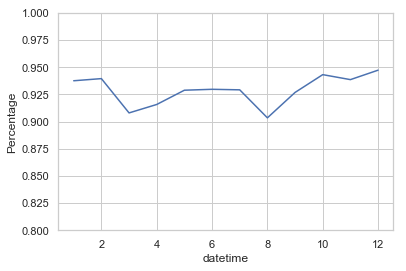

In [107]:
sns.set(style="whitegrid")
sns.lineplot(x=downtime_el_m.datetime,y=downtime_el_m.Percentage).set(ylim=(0.8,1))

In [73]:
df_new["flow_abs"] = df_new.entry_diff_abs + df_new.exit_diff_abs
df_new["weighted_dt"] = df_new.flow_abs*df_new.Percentage
downtime_el_wm = df_new.groupby(df_new.index.month).sum()['weighted_dt'].div(df_new.groupby(df_new.index.month).sum()['flow_abs'])
downtime_el_wm = downtime_el_wm.to_frame().reset_index()

In [74]:
downtime_el_wm.rename(columns={0:'weighted_downtime'},inplace=True)
downtime_el_wm.weighted_downtime = 1-downtime_el_wm.weighted_downtime

[(0.8, 1)]

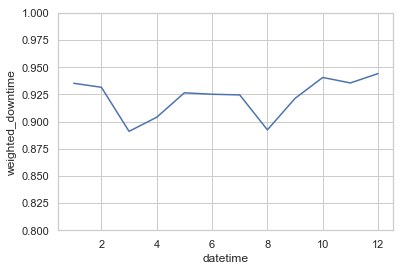

In [75]:
sns.set(style="whitegrid")
sns.lineplot(x=downtime_el_wm.datetime,y=downtime_el_wm.weighted_downtime).set(ylim=(0.8,1))

In [76]:
downtime_el_m = downtime_el_m.merge(downtime_el_wm,on="datetime")

In [94]:
downtime_el_m.rename(columns={"downtime":"DataClinic-uptime","MTA":"MTA-uptime","weighted_downtime":"people_weighted_uptime"},inplace=True)

In [91]:
downtime_el_m["MTA"] = [0.938,0.957,0.962,0.949,0.961,0.958,0.953,0.924,0.947,0.949,0.952,0.955]

In [95]:
downtime_el_m.head()

,datetime,DataClinic-uptime,people_weighted_uptime,MTA-uptime
0,1.0,0.937548,0.935232,0.938
1,2.0,0.939519,0.931546,0.957
2,3.0,0.907971,0.891029,0.962
3,4.0,0.915733,0.903967,0.949
4,5.0,0.928849,0.926489,0.961


[(0.8, 1)]

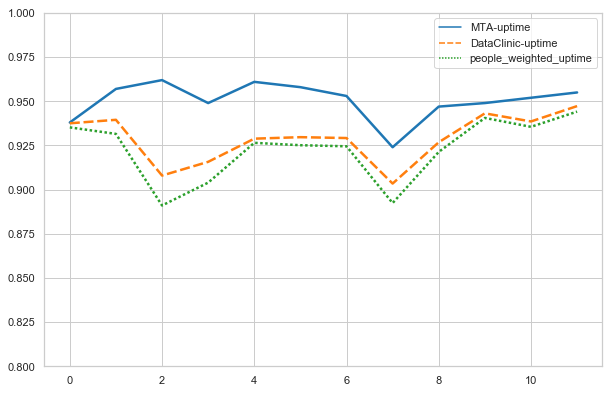

In [97]:
fig, ax = plt.subplots(figsize=(10,6.5))
sns.set(style="whitegrid")
sns.lineplot(data=downtime_el_m[["MTA-uptime","DataClinic-uptime","people_weighted_uptime"]], palette="tab10", linewidth=2.5,size=15).set(ylim=(0.8,1))


In [122]:
downtime_el_m = df_new.groupby([df_new.index.month,'station_name']).sum()['Percentage'].div(df_new.groupby([df_new.index.month,'station_name']).count()['Percentage'])

In [123]:
downtime_el_m = downtime_el_m.to_frame().reset_index()

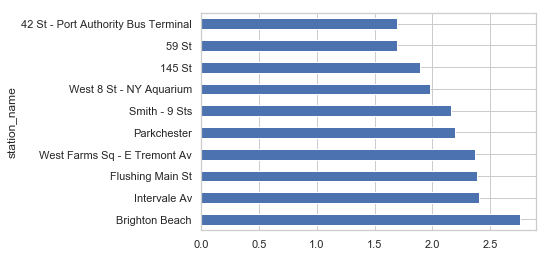

In [128]:
downtime_el_m.groupby('station_name').sum()['Percentage'].sort_values(ascending=False).head(10).plot.barh()

In [129]:
df_new['flow_abs'] = df_new['entry_diff_abs'] +df_new['exit_diff_abs']
df_new['weighted_downtime'] = df_new['flow_abs'] * df_new['Percentage']

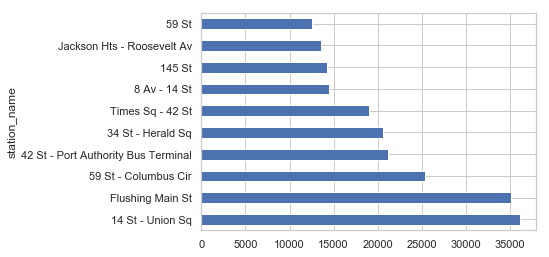

In [138]:
downtime_el_m = df_new.groupby([df_new.index.month,'station_name']).sum()['weighted_downtime'].div(df_new.groupby([df_new.index.month,'station_name']).count()['flow_abs'])
downtime_el_m = downtime_el_m.to_frame().reset_index()
downtime_el_m.rename(columns={0:'weighted_downtime'},inplace=True)
# downtime_el_m.head()
downtime_el_m.groupby('station_name').sum()['weighted_downtime'].sort_values(ascending=False).head(10).plot.barh()

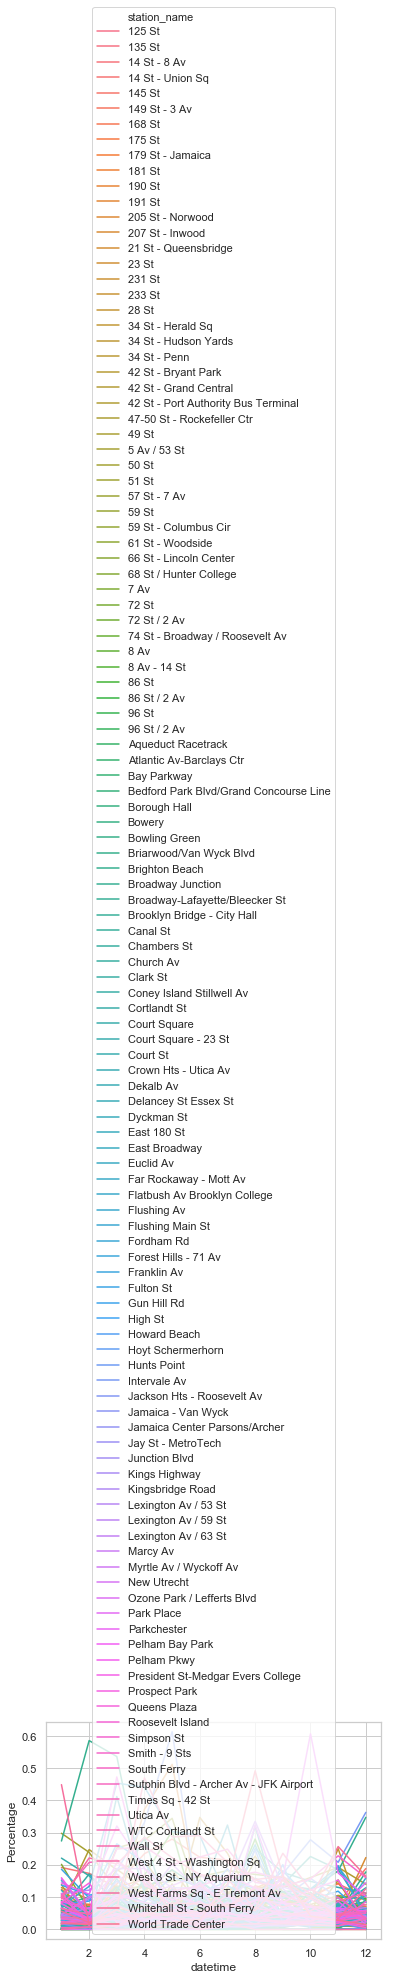

In [125]:
sns.lineplot(data=downtime_el_m,x='datetime',y='Percentage',hue='station_name')

In [3]:
df_interpolated = pd.read_pickle('../../data/cache/interpolated_turnstile.pkl.gz')

In [6]:
len(df_interpolated.index.unique())

8760

In [14]:
unique_remotes = 

(834, 10)

In [16]:
outages = pd.read_csv('../../data/processed/outages.csv.gz')

In [19]:
outages.Date = pd.to_datetime(outages.Date)

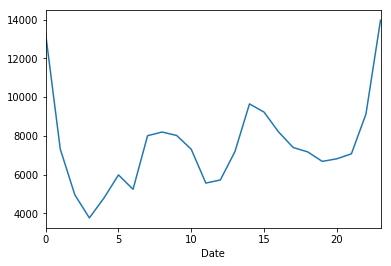

In [23]:
outages.groupby(pd.DatetimeIndex(outages.Date).hour).sum()['duration_h'].plot()

In [57]:
out = pd.read_csv('../../data/processed/2019_outages.csv.gz')

In [58]:
out.planned_outage.value_counts()

False    55083
True      1395
Name: planned_outage, dtype: int64

In [55]:
out['outage_start'] = pd.to_datetime(np.where(out.planned_outage == True, out['planned_start_time'], out['Date']), format='%Y-%m-%d %H:%M:%S')
out['outage_end'] = pd.to_datetime(out['next_alert_time'], format='%Y-%m-%d %H:%M:%S')

In [56]:
out.dtypes

Unnamed: 0                            int64
Date                                 object
Agency                               object
Subject                              object
Message Sent                         object
equipment_no_from_subject            object
equipment_no_from_message            object
outage                                 bool
back_in_service                        bool
planned_outage                         bool
planned_start_time                  float64
planned_end_time                    float64
equipment_type                       object
alert_type                           object
planned_start_date                   object
planned_end_date                     object
station_name                         object
name_and_eid                         object
next_alert_time                      object
next_alert_type                      object
duration_h                          float64
next_alert_subject                   object
next_alert_message              

In [32]:
out.planned_outage.value_counts()

False    55083
True      1395
Name: planned_outage, dtype: int64

In [36]:
import datetime

In [39]:
def test_generate_hourly_outage(outages: pd.DataFrame) -> pd.DataFrame:
    '''
    Create hourly outage percentage data for each outage in the input
    '''
    print("Generate hourly outgage...")
    outages['Outage start'] = pd.to_datetime(np.where(outages.planned_outage == True, outages['planned_start_date'], \
        outages['Date']), format='%Y-%m-%d %H:%M:%S')
    outages['Outage end'] = pd.to_datetime(outages['next_alert_time'], format='%Y-%m-%d %H:%M:%S')
    results = []
    for i, row in outages.iterrows():
        print(row.planned_outage)
        start = row['Outage start']
        end = row['Outage end']
        t = start
        while t <= end:
            outage_percentage = 0
            if t.hour == start.hour:
                outage_percentage = (t.ceil('H') - t).total_seconds() / 3600
            elif t.hour == end.hour:
                outage_percentage = (t - t.floor('H')).total_seconds() / 3600
            else:
                outage_percentage = 1.0
            print(row.planned_outage)
            results.append([t.floor('H'), outage_percentage, row['equipment_no_from_message'], row['planned_outage'],
                            row['station_name'], row['equipment_type']])
            t += datetime.timedelta(hours=1)
    return pd.DataFrame(results, columns=['Time', 'Percentage', "Equipment Number", 'Planned Outage',
                                         'Station Name', 'Equipment Type'])

In [59]:
pl_out = out[out.planned_outage==True]
pl_out.shape

(1395, 23)

In [61]:
pl_out['Outage start'] = np.where(pl_out.planned_outage == True, pd.to_datetime(pl_out['planned_start_date']), pd.to_datetime(pl_out['Date'], format='%Y-%m-%d %H:%M:%S'))
pl_out['Outage end'] = pd.to_datetime(pl_out['next_alert_time'], format='%Y-%m-%d %H:%M:%S')
results = []

/opt/conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
pl_out.head()

,Unnamed: 0,Date,Agency,Subject,Message Sent,equipment_no_from_subject,equipment_no_from_message,outage,back_in_service,planned_outage,...,planned_end_date,station_name,name_and_eid,next_alert_time,next_alert_type,duration_h,next_alert_subject,next_alert_message,Outage start,Outage end
31,31,2019-07-08 14:10:19,NYC,Upcoming outage planned for Elevator at 191 St,Elevator EL103 is located Street to Mezzanine ...,NaN,EL103,True,False,True,...,2019-07-09 06:00:00,191 St,191 St EL103,2019-07-09 04:28:27,restore,5.474167,Elevator at 191 St is back in service (EL103),Elevator EL103 is located Street to Mezzanine ...,NaT,2019-07-09 04:28:27
35,35,2019-07-22 07:10:30,NYC,Upcoming outage planned for Elevator at 191 St,Elevator EL103 is located Street to Mezzanine ...,NaN,EL103,True,False,True,...,2019-07-23 06:00:00,191 St,191 St EL103,2019-07-23 04:19:04,restore,5.317778,Elevator at 191 St is back in service (EL103),Elevator EL103 is located Street to Mezzanine ...,NaT,2019-07-23 04:19:04
105,105,2019-07-23 11:58:43,NYC,Upcoming outage planned for Elevator at 191 St,Elevator EL104 is located Lower Mezzanine to S...,NaN,EL104,True,False,True,...,2019-07-24 06:00:00,191 St,191 St EL104,2019-07-24 04:17:18,restore,5.288333,Elevator at 191 St is back in service (EL104),Elevator EL104 is located Lower Mezzanine to S...,NaT,2019-07-24 04:17:18
263,263,2019-08-12 10:41:43,NYC,Upcoming outage planned for Elevator at 191 St,Elevator EL106 is located Lower Mezzanine to S...,NaN,EL106,True,False,True,...,2019-08-13 06:00:00,191 St,191 St EL106,2019-08-13 06:32:56,restore,7.548889,Elevator at 191 St is back in service (EL106),Elevator EL106 is located Lower Mezzanine to S...,NaT,2019-08-13 06:32:56
335,335,2019-07-24 12:25:22,NYC,Upcoming outage planned for Elevator at 181 St,Elevator EL107 is located Lower Mezzanine and ...,NaN,EL107,True,False,True,...,2019-07-25 06:00:00,181 St,181 St EL107,2019-07-25 04:02:32,restore,5.042222,Elevator at 181 St is back in service (EL107),Elevator EL107 is located Lower Mezzanine and ...,NaT,2019-07-25 04:02:32


In [51]:
row = pl_out.iloc[0]

In [52]:
row

Unnamed: 0                                                                  31
Date                                                       2019-07-08 14:10:19
Agency                                                                     NYC
Subject                         Upcoming outage planned for Elevator at 191 St
Message Sent                 Elevator EL103 is located Street to Mezzanine ...
equipment_no_from_subject                                                  NaN
equipment_no_from_message                                                EL103
outage                                                                    True
back_in_service                                                          False
planned_outage                                                            True
planned_start_time                                                         NaN
planned_end_time                                                           NaN
equipment_type                                      

In [63]:
row.planned_start_date

'2019-07-08 23:00:00'

In [65]:
pl_out.dtypes

Unnamed: 0                            int64
Date                                 object
Agency                               object
Subject                              object
Message Sent                         object
equipment_no_from_subject            object
equipment_no_from_message            object
outage                                 bool
back_in_service                        bool
planned_outage                         bool
planned_start_time                  float64
planned_end_time                    float64
equipment_type                       object
alert_type                           object
planned_start_date                   object
planned_end_date                     object
station_name                         object
name_and_eid                         object
next_alert_time                      object
next_alert_type                      object
duration_h                          float64
next_alert_subject                   object
next_alert_message              

In [ ]:
pl_out.planned_start_date